#### Team: Balogh Szilard, Bajan Ramona-Maria, Popa Sebastian
## Problem 1

In [41]:
import pandas as pd
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

file_path = 'ObesityDataset.csv'
df = pd.read_csv(file_path)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.00,yes,no,3.0,NaN,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.80,no,NaN,2.0,1.0,Sometimes,no,NaN,no,0.00,0.000,Sometimes,NaN,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,NaN,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,NaN,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,1.75,NaN,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,1.74,133.35,yes,NaN,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,NaN,Obesity_Type_III


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1889 non-null   object 
 1   Age                             1894 non-null   float64
 2   Height                          1889 non-null   float64
 3   Weight                          1902 non-null   float64
 4   family_history_with_overweight  1909 non-null   object 
 5   FAVC                            1887 non-null   object 
 6   FCVC                            1888 non-null   float64
 7   NCP                             1898 non-null   float64
 8   CAEC                            1916 non-null   object 
 9   SMOKE                           1903 non-null   object 
 10  CH2O                            1913 non-null   float64
 11  SCC                             1906 non-null   object 
 12  FAF                             19

In [43]:
print("Missing values before imputation:\n", df.isnull().sum())

Missing values before imputation:
 Gender                            222
Age                               217
Height                            222
Weight                            209
family_history_with_overweight    202
FAVC                              224
FCVC                              223
NCP                               213
CAEC                              195
SMOKE                             208
CH2O                              198
SCC                               205
FAF                               193
TUE                               224
CALC                              223
MTRANS                            220
NObeyesdad                          0
dtype: int64


In [44]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

In [45]:
start_time = time.time()

df_mean_mode = df.copy()
df_mean_mode[numerical_cols] = df_mean_mode[numerical_cols].fillna(df_mean_mode[numerical_cols].mean())
df_mean_mode[categorical_cols] = df_mean_mode[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for operations in mean_mode approach: {elapsed_time:.4f} seconds")

Time taken for operations in mean_mode approach: 0.0280 seconds


In [46]:
start_time = time.time()

df_knn = df.copy()
df_knn_encoded = df_knn.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_knn_encoded[col] = le.fit_transform(df_knn_encoded[col].astype(str)) 
    label_encoders[col] = len

knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed_array = knn_imputer.fit_transform(df_knn_encoded)
df_knn_imputed = pd.DataFrame(df_knn_imputed_array, columns=df_knn_encoded.columns)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for operations in KNN approach: {elapsed_time:.4f} seconds")

Time taken for operations in KNN approach: 0.3563 seconds


In [47]:
start_time = time.time()

df_median = df.copy()
df_median[numerical_cols] = df_median[numerical_cols].fillna(df_median[numerical_cols].median())
df_median[categorical_cols] = df_median[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for operations in median approach: {elapsed_time:.4f} seconds")

Time taken for operations in median approach: 0.0233 seconds


In [48]:
print("Missing values after Mean/Mode imputation:\n", df_mean_mode.isnull().sum())
print("Missing values after KNN imputation:\n", df_knn_imputed.isnull().sum())
print("Missing values after Median imputation:\n", df_median.isnull().sum())

Missing values after Mean/Mode imputation:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Missing values after KNN imputation:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC 

In [49]:
def prepare_data(df):
    df_encoded = df.copy()
    for col in categorical_cols:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
    
    X = df_encoded.drop(columns=['NObeyesdad'])
    y = df_encoded['NObeyesdad']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
    
    return X_train, X_test, y_train, y_test

X_train_mean, X_test_mean, y_train_mean, y_test_mean = prepare_data(df_mean_mode)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = prepare_data(df_knn_imputed)

In [50]:
def train_and_evaluate(X_train, X_test, y_train, y_test, method_name):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy using {method_name} Imputation: {acc:.4f}")
    return acc 

accuracy_mean = train_and_evaluate(X_train_mean, X_test_mean, y_train_mean, y_test_mean, "Mean/Mode")
accuracy_knn = train_and_evaluate(X_train_knn, X_test_knn, y_train_knn, y_test_knn, "KNN")

Accuracy using Mean/Mode Imputation: 0.7139
Accuracy using KNN Imputation: 0.8180


In [51]:
import time

start_time_mean = time.time()
df_mean = df.copy()
df_mean[numerical_cols] = df_mean[numerical_cols].fillna(df_mean[numerical_cols].mean())
df_mean[categorical_cols] = df_mean[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
time_mean = time.time() - start_time_mean

start_time_knn = time.time()
df_knn = df.copy()
df_knn_encoded = df_knn.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_knn_encoded[col] = le.fit_transform(df_knn_encoded[col].astype(str))
    label_encoders[col] = le

knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed_array = knn_imputer.fit_transform(df_knn_encoded)
df_knn_imputed = pd.DataFrame(df_knn_imputed_array, columns=df_knn_encoded.columns)
time_knn = time.time() - start_time_knn

print(f"Time taken for Mean Imputation: {time_mean:.4f} seconds")
print(f"Time taken for KNN Imputation: {time_knn:.4f} seconds")

Time taken for Mean Imputation: 0.0188 seconds
Time taken for KNN Imputation: 0.2365 seconds


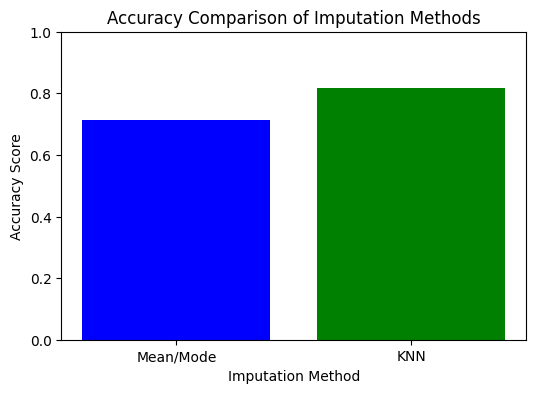

In [52]:
import matplotlib.pyplot as plt

imputation_methods = ['Mean/Mode', 'KNN']
accuracy_scores = [accuracy_mean, accuracy_knn]  

plt.figure(figsize=(6, 4))
plt.bar(imputation_methods, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Comparison of Imputation Methods')
plt.xlabel('Imputation Method')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

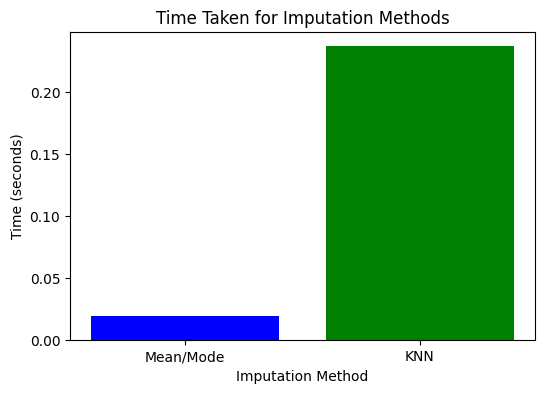

In [53]:
imputation_methods = ['Mean/Mode', 'KNN']
time_taken = [time_mean, time_knn]  

plt.figure(figsize=(6, 4))
plt.bar(imputation_methods, time_taken, color=['blue', 'green'])
plt.title('Time Taken for Imputation Methods')
plt.xlabel('Imputation Method')
plt.ylabel('Time (seconds)')
plt.show()

##### In this experiment we compared two different imputation techniques: Mean/Mode imputation and K-Nearest Neighbours imputation. We trained a Logistic Regression model to classify the target variable NObeyesdad and compare the accuracy of the two approaches. The results indicate that KNN Imputation generally provides a higher accuracy than Mean/Mode Imputation. Mean/Mode Imputation accuracy being only 0.7139, meanwhile KNN Imput accuracy is 0.8180. 
##### Another crucial factor is the time it takes to complete the imputation. For our case, having a dataset of 2111 lines and 16 columns (features) with about 10% of the data missing, it took about 0.0112 seconds for the Mean/Mode Imputation to complete, meanwhile this process took 0.1395 seconds for the KNN algorithm, so more than 10 times more. If our dataset was much larger, the time difference would have been very significant. 
##### Another observation is related to choosing the optimal value for 'k' in the KNN approach. By trying different values, the best accuracy we managed to find was 0.8180 for k = 5. A higher value for 'k' doesn't necessarily mean a greater accuracy, for instance, if we set k = 50, the accuracy of the model was only about 0.7730. Regarding the logistic regression, we have noticed that for our dataset, we have to set max_iter to at least 274, if we set a value below this, we get a warning saying that the algorithm didn't manage to converge. In our case, regardless of what value we specify that is greater than or equal to 274, it doesn't influence the accuracy of either the Mean/Mode or the KNN approach.
##### The Accuracy Comparison Plot shows the difference between Mean/Mode and KNN Imputation. The accuracy for KNN Imputation (0.8180) is significantly higher than that for Mean/Mode Imputation (0.7139), confirming that KNN Imputation is more effective for this dataset. The Time Comparison Plot illustrates the difference between Mean/Mode and KNN Imputation. KNN takes significantly more time compared to Mean/Mode Imputation, showing the balance between how accurate the results are and how fast the process runs.